In [49]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [50]:
import zipfile

In [51]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/bvlaja/emosi.zip", 'r')
zip_ref.extractall("/content/dataset")
zip_ref.close()

Importing libraries

In [52]:
  >>> import nltk
  >>> nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Importing libraries**

In [53]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

#nltk.download("stopwords")
stop_words = set(stopwords.words("english"))
lemmatizer= WordNetLemmatizer()

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

In [54]:
# Read datasets
df = pd.read_csv('/content/dataset/Product Reviews Dataset for Emotions Classification Tasks - Indonesian (PRDECT-ID) Dataset/PRDECT-ID Dataset.csv')

In [55]:
df.head()

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
0,Computers and Laptops,Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...,Jakarta Utara,53500,4.9,5449,2369,5,Alhamdulillah berfungsi dengan baik. Packaging...,Positive,Happy
1,Computers and Laptops,PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...,Kota Tangerang Selatan,72000,4.9,2359,1044,5,"barang bagus dan respon cepat, harga bersaing ...",Positive,Happy
2,Computers and Laptops,SSD Midasforce 128 Gb - Tanpa Caddy,Jakarta Barat,213000,5.0,12300,3573,5,"barang bagus, berfungsi dengan baik, seler ram...",Positive,Happy
3,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,bagus sesuai harapan penjual nya juga ramah. t...,Positive,Happy
4,Computers and Laptops,ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...,Jakarta Timur,55000,4.7,2030,672,5,"Barang Bagus, pengemasan Aman, dapat Berfungsi...",Positive,Happy


In [56]:
#print the shape of the data set
print(df.shape)

(5400, 11)


# **Assessing**

Train dataset

In [57]:
#check if the data is balanced or not
df.Emotion.value_counts()

Happy      1770
Sadness    1202
Fear        920
Love        809
Anger       699
Name: Emotion, dtype: int64

In [58]:
#check if the data is balanced or not
df.Emotion.value_counts() / df.shape[0] *100

Happy      32.777778
Sadness    22.259259
Fear       17.037037
Love       14.981481
Anger      12.944444
Name: Emotion, dtype: float64

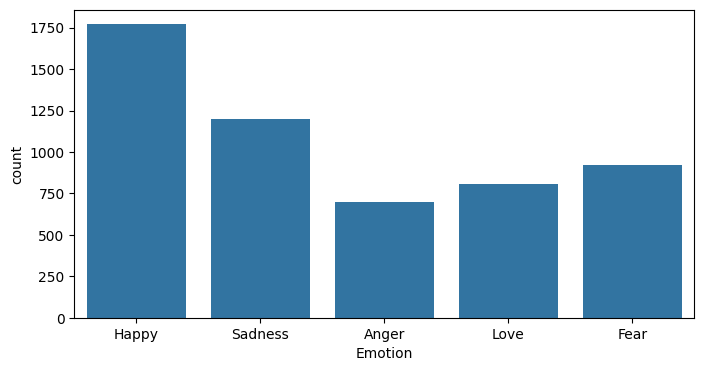

In [59]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=df);

In [60]:
#print the number of null values in each column
df.isnull().sum()

Category           0
Product Name       0
Location           0
Price              0
Overall Rating     0
Number Sold        0
Total Review       0
Customer Rating    0
Customer Review    0
Sentiment          0
Emotion            0
dtype: int64

In [61]:
#print the number of duplicated values
df.duplicated().sum()

7

In [62]:
#removing duplicated values
index = df[df.duplicated() == True].index
df.drop(index, axis = 0, inplace = True)
df.reset_index(inplace=True, drop = True)

In [63]:
#print the rows which are duplicated (duplicated in the Customer Review	 but with different emotions)
df[df['Customer Review'].duplicated() == True]

,Category,Product Name,Location,Price,Overall Rating,Number Sold,Total Review,Customer Rating,Customer Review,Sentiment,Emotion
76,Computers and Laptops,Logitech M191 Mouse Wireless Full Size - Mid Grey,Jakarta Timur,299000,4.9,9798,5559,1,Sangat kecewa. Baru 4 bulan scroll sudah rusak.,Negative,Sadness
187,Computers and Laptops,RB - C78 Meja Laptop Lipat Portable Meja Belaj...,Kab. Tangerang,39998,4.7,5936,2344,1,biarkan gambar bercerita.. pesan 20 bh yg rusa...,Negative,Fear
188,Computers and Laptops,RB - C78 Meja Laptop Lipat Portable Meja Belaj...,Kab. Tangerang,39998,4.7,5936,2344,1,"Seharusnya chat dijadikan makesure barang, war...",Negative,Fear
278,Toys and Hobbies,Paket UNO STACKO + KARTU UNO + 2 DADU - paket ...,Jakarta Pusat,50000,4.9,6036,3462,1,barangnya datang dalam keadaan tidak bagus,Negative,Anger
279,Toys and Hobbies,Jumping Pirates Roulette Family Game,Kota Tangerang,35000,4.8,5415,2330,1,Barang rusak ga berfungsi sama sekali� ga bisa...,Negative,Anger
...,...,...,...,...,...,...,...,...,...,...,...
4025,Kitchen,Bagus Anti Bau Gel Lemari Es 180 gr,Jakarta Utara,37300,4.9,5216,1413,1,Pengiriman sangat lama,Negative,Sadness
4137,Electronics,Xiaomi Xiaovv Webcam 1080P USB Camera Full HD ...,Jakarta Barat,188000,4.9,3231,1518,1,"Packing seadanya, bubble hanya selapis saja di...",Negative,Sadness
4903,Mother and Baby,Merries Pants Positive Skin L 39,Kota Bekasi,50800,5.0,5700,1696,3,packingnya kurang memuaskan,Negative,Anger
5166,Beauty,MAKE OVER Hydrastay Radiant Finishing Powder 8...,Kab. Serang,120000,4.9,3055,1694,5,Pengiriman cepat. Pesanan sesuai. Gak ada caca...,Positive,Happy


In [64]:
#print some of those rows to check
print(df[df['Customer Review'] == df.iloc[0]['Customer Review']])


                Category                                       Product Name  \
0  Computers and Laptops  Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   

        Location  Price  Overall Rating  Number Sold  Total Review  \
0  Jakarta Utara  53500             4.9         5449          2369   

   Customer Rating                                    Customer Review  \
0                5  Alhamdulillah berfungsi dengan baik. Packaging...   

  Sentiment Emotion  
0  Positive   Happy  


In [65]:
#removing duplicated Customer Review
index = df[df['Customer Review'].duplicated() == True].index
df.drop(index, axis = 0, inplace = True)

In [66]:
#Count the number of stopwords in the data
temp =df.copy()
stop_words = set(stopwords.words("english"))
temp['stop_words'] = temp['Customer Review'].apply(lambda x: len(set(x.split()) & set(stop_words)))

In [67]:
print(temp['stop_words'])

0       0
1       0
2       0
3       0
4       0
       ..
5388    0
5389    0
5390    0
5391    0
5392    0
Name: stop_words, Length: 5305, dtype: int64


<Axes: ylabel='Frequency'>

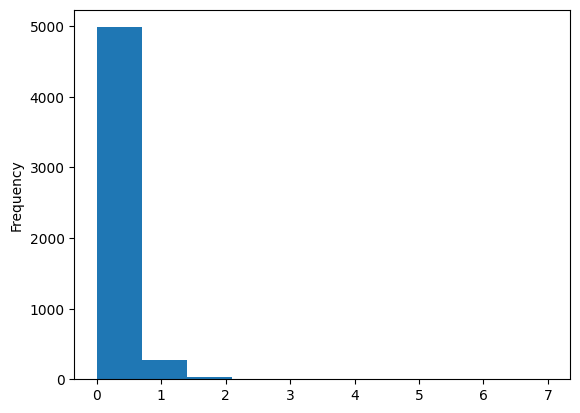

In [68]:
#distribution of stopwords visually
temp['stop_words'].plot(kind= 'hist')

**Cleaning**

In [69]:
def lemmatization(text):
    lemmatizer= WordNetLemmatizer()

    text = text.split()

    text=[lemmatizer.lemmatize(y) for y in text]

    return " " .join(text)

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stop_words]
    return " ".join(Text)

def Removing_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def lower_case(text):

    text = text.split()

    text=[y.lower() for y in text]

    return " " .join(text)

def Removing_punctuations(text):
    ## Remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛',"", )

    ## remove extra whitespace
    text = re.sub('\s+', ' ', text)
    text =  " ".join(text.split())
    return text.strip()

def Removing_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_small_sentences(df):
    for i in range(len(df)):
        if len(df.text.iloc[i].split()) < 3:
            df.text.iloc[i] = np.nan

def normalize_text(df):
    df.Text=df.Text.apply(lambda text : lower_case(text))
    df.Text=df.Text.apply(lambda text : remove_stop_words(text))
    df.Text=df.Text.apply(lambda text : Removing_numbers(text))
    df.Text=df.Text.apply(lambda text : Removing_punctuations(text))
    df.Text=df.Text.apply(lambda text : Removing_urls(text))
    df.Text=df.Text.apply(lambda text : lemmatization(text))
    return df

def normalized_sentence(sentence):
    sentence= lower_case(sentence)
    sentence= remove_stop_words(sentence)
    sentence= Removing_numbers(sentence)
    sentence= Removing_punctuations(sentence)
    sentence= Removing_urls(sentence)
    sentence= lemmatization(sentence)
    return sentence

In [70]:
def normalize_text(df):
    df['Customer Review'] = df['Customer Review'].apply(lambda text: lower_case(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: remove_stop_words(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: Removing_numbers(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: Removing_punctuations(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: Removing_urls(text))
    df['Customer Review'] = df['Customer Review'].apply(lambda text: lemmatization(text))
    return df


**Modeling**

# **TF-IDF**


In [71]:
#Creating a pipline using tf-idf for words embedding and different models.


In [72]:
#Preprocess Customer Review
X_train = df['Customer Review'].values
y_train = df['Emotion'].values

In [73]:
def train_model(model, data, targets):

    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([('vect',TfidfVectorizer()),
                         ('clf', model)])
    # Fit the model on the data and targets
    text_clf.fit(data, targets)
    return text_clf

In [74]:
def get_F1(trained_model,X,y):

    # Make predictions on the input data using the trained model
    predicted=trained_model.predict(X)
    # Calculate the F1 score for the predictions
    f1=f1_score(y,predicted, average=None)
    # Return the F1 score
    return f1

Training the Logistic Regression model on the Training set

In [75]:
#Train the model with the training data
log_reg = train_model(LogisticRegression(solver='liblinear',random_state = 0), X_train, y_train)

In [76]:
#Make a single prediction
y_pred=log_reg.predict(['Happy'])
y_pred

array(['Love'], dtype=object)

In [77]:
#test the model with the data
y_pred=log_reg.predict(X_train)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: ', log_reg_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(log_reg,X_train,y_train)
pd.DataFrame(f1_Score, index=df.Emotion.unique(), columns=['F1 score'])

Accuracy:  0.8203581526861451 



,F1 score
Happy,0.765558
Sadness,0.783862
Anger,0.873914
Love,0.724891
Fear,0.842230


In [78]:
##Classification Report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       Anger       0.90      0.67      0.77       675
        Fear       0.81      0.76      0.78       892
       Happy       0.81      0.95      0.87      1753
        Love       0.87      0.62      0.72       800
     Sadness       0.79      0.90      0.84      1185

    accuracy                           0.82      5305
   macro avg       0.84      0.78      0.80      5305
weighted avg       0.83      0.82      0.82      5305



# **SVM**

In [79]:
#Train the model with the training data
SVM = train_model(SVC(random_state = 0), X_train, y_train)

#test the model with the test data
y_pred=SVM.predict(X_train)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_train, y_pred)
print('Accuracy: ', SVM_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(SVM,X_train,y_train)
pd.DataFrame(f1_Score, index=df.Emotion.unique(), columns=['F1 score'])

Accuracy:  0.9730442978322338 



,F1 score
Happy,0.965257
Sadness,0.976953
Anger,0.980248
Love,0.957746
Fear,0.973761


In [80]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

       Anger       0.98      0.95      0.97       675
        Fear       0.98      0.97      0.98       892
       Happy       0.97      0.99      0.98      1753
        Love       0.98      0.94      0.96       800
     Sadness       0.96      0.99      0.97      1185

    accuracy                           0.97      5305
   macro avg       0.98      0.97      0.97      5305
weighted avg       0.97      0.97      0.97      5305



# **Text Preprocessing**

In [81]:
#Splitting the Customer Review from the labels
X_train = df['Customer Review']
y_train = df['Emotion']

X_test = df['Customer Review']
y_test = df['Emotion']

X_val = df['Customer Review']
y_val = df['Emotion']

In [82]:
# Encode labels
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)

In [83]:
#print the labels after encoding
print(set(y_train))

{0, 1, 2, 3, 4}


In [84]:
#Convert the class vector (integers) to binary class matrix
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

In [85]:
print(y_train)

[[0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 ...
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]]


# **Tokenizing**

In [86]:
# Tokenize words
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))
tokenizer.document_count

10610

In [87]:
# Add 'towards' to the tokenizer's word_index with a new index
tokenizer.word_index['towards'] = len(tokenizer.word_index) + 1

In [88]:
#converting a single sentence to list of indexes
tokenizer.texts_to_sequences(X_train[0].split())

[[293],
 [61],
 [16],
 [28],
 [74],
 [32],
 [34],
 [12],
 [2],
 [92],
 [20],
 [2],
 [174],
 [357]]

In [89]:
#convert the list of indexes into a matrix of ones and zeros (BOW)
tokenizer.texts_to_matrix(X_train[0].split())

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [90]:
#the sentence contains three words and the size of the vocabulary is 9012
tokenizer.texts_to_matrix(X_train[0].split()).shape

(14, 9012)

In [91]:
sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

In [92]:
#print the sentence after converting them to indexes
#sequences_train

# **Padding**

In [93]:
df.shape

(5305, 11)

In [94]:
maxlen = max([len(t) for t in df['Customer Review']])
maxlen

1058

In [95]:
X_train = pad_sequences(sequences_train, maxlen=229, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=229, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=229, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 9011


In [96]:
#before
sequences_train[0]

[293, 61, 16, 28, 74, 32, 34, 12, 2, 92, 20, 2, 174, 357]

In [97]:
#after
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# **Model LTSM**

In [98]:
from tensorflow.keras.layers import BatchNormalization, SpatialDropout1D

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], trainable=True))
model.add(SpatialDropout1D(0.2))
model.add(Bidirectional(LSTM(128, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(32, dropout=0.2, recurrent_dropout=0.2)))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 229, 200)          1802200   
                                                                 
 spatial_dropout1d (Spatial  (None, 229, 200)          0         
 Dropout1D)                                                      
                                                                 
 bidirectional (Bidirection  (None, 229, 256)          336896    
 al)                                                             
                                                                 
 batch_normalization (Batch  (None, 229, 256)          1024      
 Normalization)                                                  
                                                                 
 bidirectional_1 (Bidirecti  (None, 229, 128)          164352    
 onal)                                                  

In [99]:
import tensorflow as tf


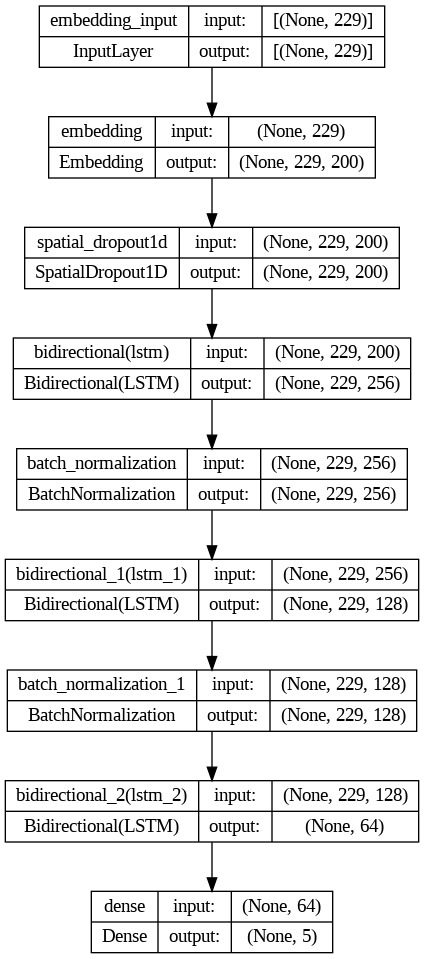

In [100]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [101]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [102]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

class customCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.98 and logs.get('val_accuracy') > 0.98:
            print("\nAkurasi pada data pelatihan dan data validasi mencapai nilai > 95%")
            self.model.stop_training = True

early_stopping = EarlyStopping(
    monitor='val_accuracy',
    min_delta=0.00005,
    patience=20,
    verbose=1,
    restore_best_weights=True,
)

lr_scheduler = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=5,
    min_lr=1e-7,
    verbose=1,
)

callbacks = [
    early_stopping,
    lr_scheduler,
    customCallback(),
]

In [103]:
# Fit model
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    verbose=1,
                    batch_size=256,
                    epochs=30,
                    callbacks=[callbacks]
                   )

Epoch 1/30
21/21 [==============================] - 123s 5s/step - loss: 1.4502 - accuracy: 0.3744 - val_loss: 1.5814 - val_accuracy: 0.3559 - lr: 0.0010
Epoch 2/30
21/21 [==============================] - 100s 5s/step - loss: 1.0656 - accuracy: 0.5139 - val_loss: 1.5194 - val_accuracy: 0.4756 - lr: 0.0010
Epoch 3/30
21/21 [==============================] - 97s 5s/step - loss: 0.9404 - accuracy: 0.5434 - val_loss: 1.4613 - val_accuracy: 0.5297 - lr: 0.0010
Epoch 4/30
21/21 [==============================] - 105s 5s/step - loss: 0.8385 - accuracy: 0.6058 - val_loss: 1.4021 - val_accuracy: 0.5427 - lr: 0.0010
Epoch 5/30
21/21 [==============================] - 99s 5s/step - loss: 0.6623 - accuracy: 0.7352 - val_loss: 1.3395 - val_accuracy: 0.5770 - lr: 0.0010
Epoch 6/30
21/21 [==============================] - 99s 5s/step - loss: 0.5178 - accuracy: 0.8109 - val_loss: 1.2476 - val_accuracy: 0.6386 - lr: 0.0010
Epoch 7/30
21/21 [==============================] - 99s 5s/step - loss: 0.3815 

In [104]:
#print the overall loss and accuracy
lstm_accuracy = model.evaluate(X_val, y_val, verbose=1)[1]

166/166 [==============================] - 59s 357ms/step - loss: 0.0723 - accuracy: 0.9806


In [108]:
predicted = model.predict(X_test)
y_pred = predicted.argmax(axis=-1)

print(classification_report(le.transform(df['Emotion']), y_pred))

166/166 [==============================] - 66s 391ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       675
           1       0.99      0.96      0.97       892
           2       0.99      0.99      0.99      1753
           3       0.99      0.97      0.98       800
           4       0.96      0.99      0.98      1185

    accuracy                           0.98      5305
   macro avg       0.98      0.98      0.98      5305
weighted avg       0.98      0.98      0.98      5305



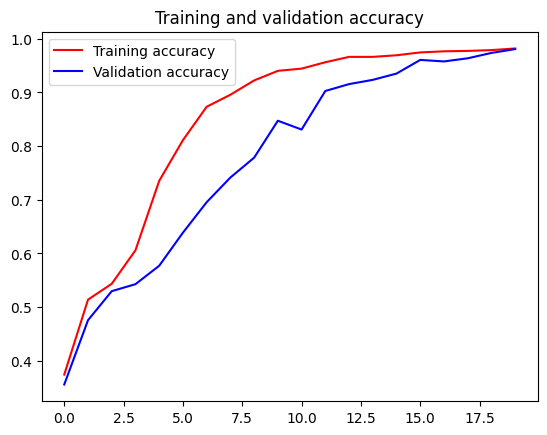

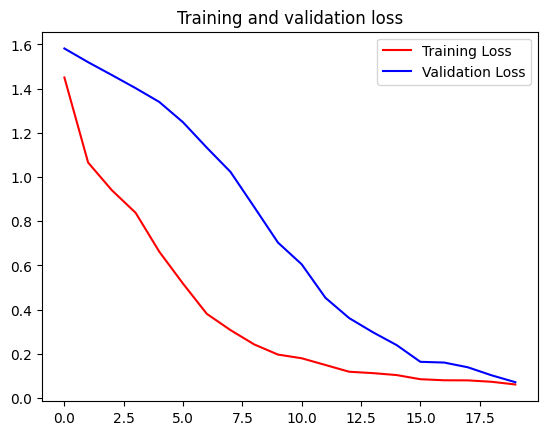

In [106]:
# Visualize Loss & Accuracy

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Results**

In [109]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'SVM', 'LSTM'],
    'Accuracy': [round(log_reg_accuracy, 2), round(SVM_accuracy, 2), round(lstm_accuracy, 2)]
})

models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

,Model,Accuracy
0,LSTM,0.98
1,SVM,0.97
2,Logistic Regression,0.82


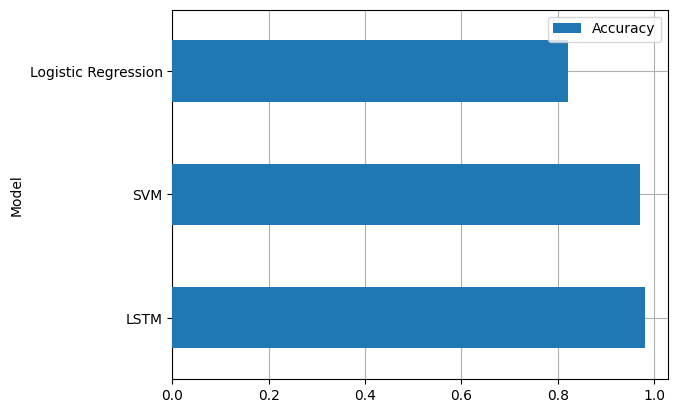

In [112]:
Accuracy = models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

fig, ax = plt.subplots()
Accuracy.plot(x='Model', y='Accuracy', kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)
